# Applied Probability and Statistics - Lab Session 2

## Hugo Parazza, Malik Hacini

## Exercise 1


## Exercise 2

### Question 1

In [2]:
N <- 1000    
n <- 10      
theta <- 0.25

set.seed(123) 
data_vector <- rexp(n = N * n, rate = theta)
X_matrix <- matrix(data_vector, nrow = N, ncol = n)


theta1_hat <- n / rowSums(X_matrix)

sum_squares <- rowSums(X_matrix^2)
theta2_hat <- sqrt((2 * n) / sum_squares)

head(theta1_hat)
head(theta2_hat)

[1] 0.2832150 0.2954462 0.1277567 0.2673903 0.3178849 0.2129881

[1] 0.3393669 0.2756356 0.1434473 0.2603050 0.3587309 0.1882408

### Question 2

--- RESULTS FOR n = 10 ---
Estimator 1: Bias=0.03171 | Var=0.00906 | Risk=0.01006
Estimator 2: Bias=0.04998 | Var=0.01139 | Risk=0.01387
--------------------------


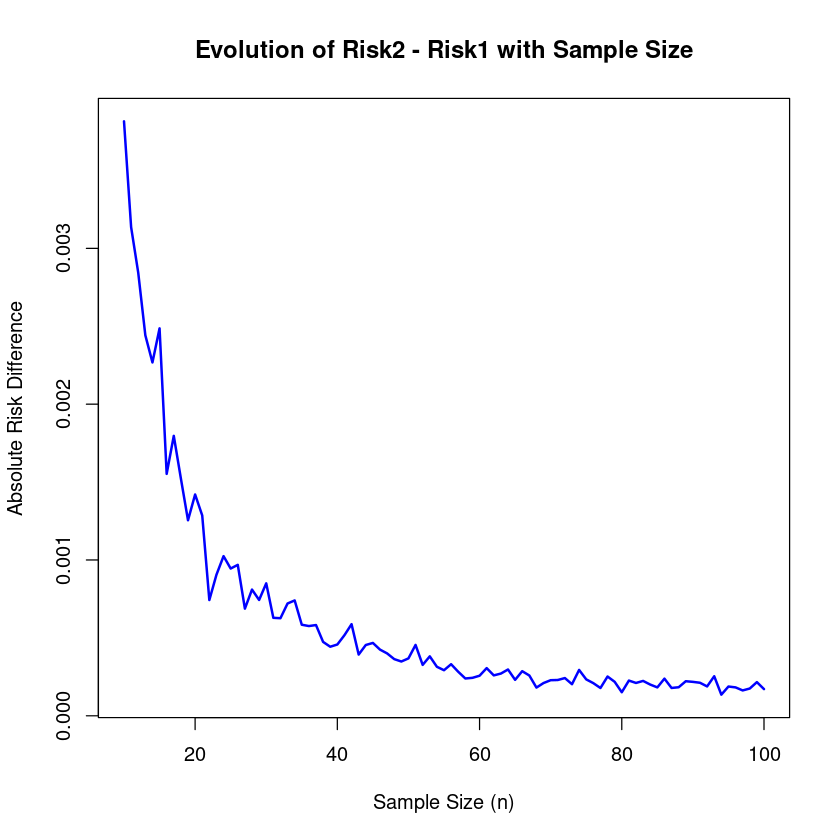

In [21]:
N <- 1000
theta <- 0.25
n_values <- 10:100
risk_diffs <- numeric(length(n_values))

for (i in seq_along(n_values)) {
  n <- n_values[i]
  
  X <- matrix(rexp(N * n, rate = theta), nrow = N, ncol = n)
  
  t1 <- n / rowSums(X)
  t2 <- sqrt((2 * n) / rowSums(X^2))
  
  r1 <- mean((t1 - theta)^2)
  r2 <- mean((t2 - theta)^2)
  
  if (n == 10) {
    b1 <- mean(t1) - theta; v1 <- var(t1)
    b2 <- mean(t2) - theta; v2 <- var(t2)
    
    cat("--- RESULTS FOR n = 10 ---\n")
    cat(sprintf("Estimator 1: Bias=%.5f | Var=%.5f | Risk=%.5f\n", b1, v1, r1))
    cat(sprintf("Estimator 2: Bias=%.5f | Var=%.5f | Risk=%.5f\n", b2, v2, r2))
    cat("--------------------------\n")
  }
  
  risk_diffs[i] <- r2 - r1
}

plot(n_values, risk_diffs, type = "l", col = "blue", lwd = 2,
     main = "Evolution of Risk2 - Risk1 with Sample Size",
     xlab = "Sample Size (n)", ylab = "Absolute Risk Difference")


We observe empirically that $\hat{\theta}_{1,n}$ has the lower risk. However, the difference quickly decreases as $n$ increases.

### Question 3


#### Estimator $\hat{\theta}_{1,n}$
The estimator is defined as $\hat{\theta}_{1,n} = \frac{n}{\sum X_i} = \frac{1}{\overline{X}_n}$.

Since $E[X_i] = 1/\theta$ and $Var(X_i) = 1/\theta^2 < \infty$, the CLT applies to the sample mean $\overline{X}_n$:
$$\sqrt{n} \left( \overline{X}_n - \frac{1}{\theta} \right) \xrightarrow{d} \mathcal{N}\left(0, \frac{1}{\theta^2}\right)$$

Let $g(x) = \frac{1}{x}$. We have $\hat{\theta}_{1,n} = g(\overline{X}_n)$.
The derivative is $g'(x) = -\frac{1}{x^2}$. Evaluated at the mean $\mu = 1/\theta$:
$$g'(\mu) = g'\left(\frac{1}{\theta}\right) = -\theta^2$$


According to the Delta Method, 
$$
\sqrt{n}(g(\overline{X}_n) - g(\mu)) \xrightarrow{d} \mathcal{N}(0, [g'(\mu)]^2 \sigma^2) \quad \text{with} \quad [g'(\mu)]^2 \sigma^2 = (-\theta^2)^2 \cdot \frac{1}{\theta^2} = \theta^2
$$

Finally :
$$\sqrt{n} (\hat{\theta}_{1,n} - \theta) \xrightarrow{d} \mathcal{N}(0, \theta^2).$$


#### Estimator $\hat{\theta}_{2,n}$

The estimator is defined as $\hat{\theta}_{2,n} = \sqrt{\frac{2n}{\sum X_i^2}} = \sqrt{\frac{2}{\overline{Y}_n}}$, where $Y_i = X_i^2$.

Let us first compute the moments of $Y_i$.
 $$ E[Y_i] = E[X_i^2] = \frac{2!}{\theta^2} = \frac{2}{\theta^2},  \quad 
 E[Y_i^2] = \frac{24}{\theta^4} \quad \text{and} \quad
 Var(Y_i) = E[Y_i^2] - (E[Y_i])^2 =  \frac{20}{\theta^4} $$

the CLT applies again, which gives $$\sqrt{n} \left( \overline{Y}_n - \frac{2}{\theta^2} \right) \xrightarrow{d} \mathcal{N}\left(0, \frac{20}{\theta^4}\right)$$


Let $h(y) = \sqrt{\frac{2}{y}} = \sqrt{2}y^{-1/2}$. We have $\hat{\theta}_{2,n} = h(\overline{Y}_n)$.
The derivative is $h'(y) = \sqrt{2}(-\frac{1}{2})y^{-3/2} = -\frac{1}{\sqrt{2}}y^{-3/2}$.
Evaluated at $\mu_Y = \frac{2}{\theta^2}$:
$$h'(\mu_Y) = -\frac{1}{\sqrt{2}} \left( \frac{2}{\theta^2} \right)^{-3/2} = -\frac{1}{\sqrt{2}} \left( \frac{\theta^2}{2} \right)^{3/2} = -\frac{1}{\sqrt{2}} \frac{\theta^3}{2\sqrt{2}} = -\frac{\theta^3}{4}$$

The asymptotic variance is $$ [h'(\mu_Y)]^2 \cdot Var(Y_i) = \left( -\frac{\theta^3}{4} \right)^2 \cdot \frac{20}{\theta^4}= \frac{5}{4}\theta^2 $$

Finally, according to the Delta method :
$$\sqrt{n} (\hat{\theta}_{2,n} - \theta) \xrightarrow{d} \mathcal{N}\left(0, \frac{5}{4}\theta^2\right)$$

We can conclude that $\hat{\theta}_{1,n}$ asymptotically has a lower variance. However, risk is the sum of the square of bias and the variance, and since the estimators are consistent, the asymptotic method doesn't allow for a bias computation. We thus can not get a full theoretical comparison. To perform an empirical comparison, we opt for a trajectory plot of both estimators alongside a bias difference plot, from which we can deduce the behavior of the biases.

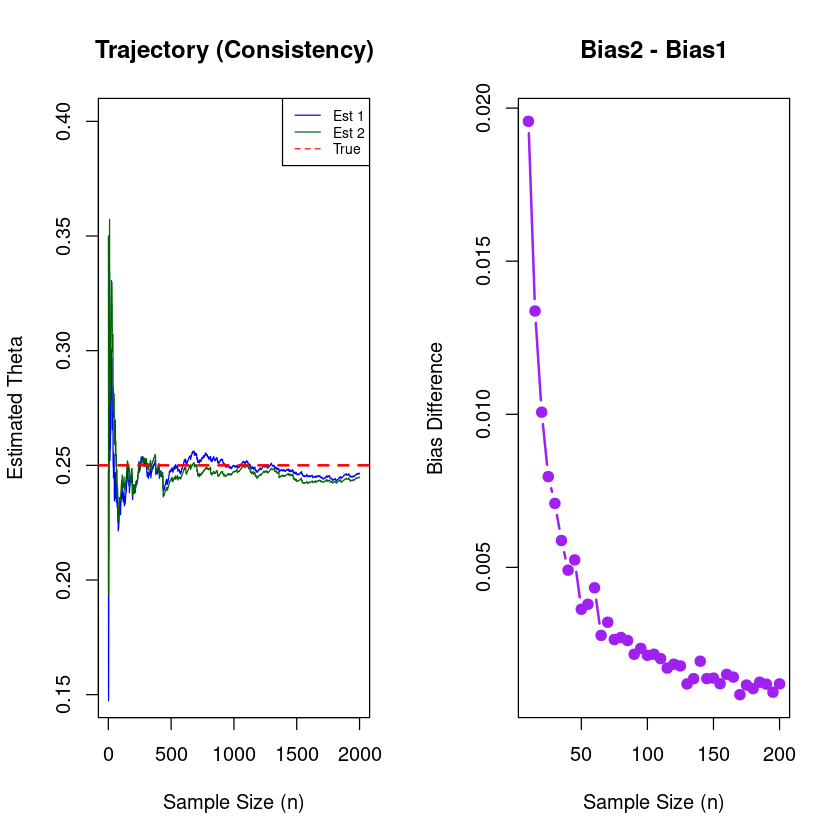

In [101]:
par(mfrow = c(1, 2))

#Plot 1 : Trajectories
n_max <- 2000
theta <- 0.25

X_traj <- rexp(n_max, rate = theta)

n_seq <- 1:n_max
sum_X <- cumsum(X_traj)
sum_X2 <- cumsum(X_traj^2)

traj_1 <- n_seq / sum_X
traj_2 <- sqrt((2 * n_seq) / sum_X2)

# Plot
plot(n_seq, traj_1, type = "l", col = "blue", lwd = 1,
     ylim = c(0.15, 0.40), 
     main = "Trajectory (Consistency)",
     xlab = "Sample Size (n)", ylab = "Estimated Theta")

lines(n_seq, traj_2, col = "darkgreen", lwd = 1)
abline(h = theta, col = "red", lwd = 2, lty = 2)
legend("topright", legend=c("Est 1", "Est 2", "True"),
       col=c("blue", "darkgreen", "red"), lty=c(1,1,2), cex=0.7)


# Plot 2 : Bias difference
N_sim <- 2000
n_vals <- seq(10, 200, by = 5) # Check n from 10 to 200
bias_diffs <- numeric(length(n_vals))

for (i in seq_along(n_vals)) {
  n <- n_vals[i]
  
  X_mat <- matrix(rexp(N_sim * n, rate = theta), nrow = N_sim, ncol = n)
  
  est_1 <- n / rowSums(X_mat)
  est_2 <- sqrt((2 * n) / rowSums(X_mat^2))
  
  bias_1 <- mean(est_1) - theta
  bias_2 <- mean(est_2) - theta
  
  bias_diffs[i] <- bias_2 - bias_1
}

plot(n_vals, bias_diffs, type = "b", pch = 19, col = "purple", lwd = 2,
     main = "Bias2 - Bias1",
     xlab = "Sample Size (n)", ylab = "Bias Difference")

abline(h = 0, col = "black", lty = 2)

# Reset layout
par(mfrow = c(1, 1))

We observe that the bias of $\hat{\theta}_{2,n}$ is higher. However, the difference quickly decreases as $n$ increases. We can thus conclude that $\hat{\theta}_{1,n}$ is the superior estimator from all aspects.

### Question 4

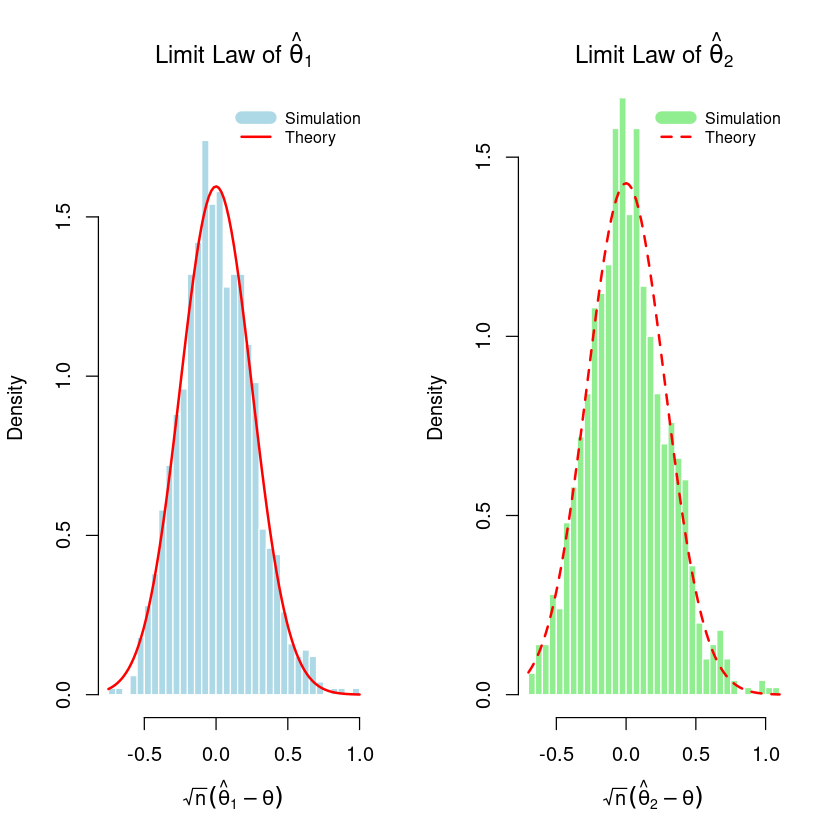

In [ ]:
#Params
N <- 1000
n <- 1000
theta <- 0.25   

# Simulation
X <- matrix(rexp(N * n, rate = theta), nrow = N, ncol = n)

theta1_hat <- n / rowSums(X)
theta2_hat <- sqrt((2 * n) / rowSums(X^2))

Z1 <- sqrt(n) * (theta1_hat - theta)
Z2 <- sqrt(n) * (theta2_hat - theta)

sd_limit_1 <- theta 
sd_limit_2 <- sqrt(5/4) * theta

#Plotting
par(mfrow = c(1, 2)) 

hist(Z1, breaks = 30, probability = TRUE, col = "lightblue", border = "white",
     main = expression(paste("Limit Law of ", hat(theta)[1])),
     xlab = expression(sqrt(n) * (hat(theta)[1] - theta)),
     ylim = c(0, 1.8)) 

curve(dnorm(x, mean = 0, sd = sd_limit_1), 
      add = TRUE, col = "red", lwd = 2)

legend("topright", legend = c("Simulation", "Theory "),
       col = c("lightblue", "red"), lwd = c(10, 2), bty = "n", cex=0.8)


hist(Z2, breaks = 30, probability = TRUE, col = "lightgreen", border = "white",
     main = expression(paste("Limit Law of ", hat(theta)[2])),
     xlab = expression(sqrt(n) * (hat(theta)[2] - theta)),
     ylim = c(0, 1.6))

curve(dnorm(x, mean = 0, sd = sd_limit_2), 
      add = TRUE, col = "red", lwd = 2, lty = 2)

legend("topright", legend = c("Simulation", "Theory "),
       col = c("lightgreen", "red"), lwd = c(10, 2), lty=c(1,2), bty = "n", cex=0.8)



The simulation confirms the validity of the limit laws : we especially observe that the histogram for $\hat{\theta}_{2,n}$ is slightly wider than the histogram for $\hat{\theta}_{1,n}$, reflecting the variance difference.


## Exercise 3

### Question 1


We start by determining the distribution of the sum of the observations. We know that if $X_i \sim \mathcal{E}(\theta)$, then $2\theta X_i \sim \chi^2_2$.
The sum of independent Chi-squared variables follows a Chi-squared distribution with the sum of the degrees of freedom. Therefore:
$$Q = \sum_{i=1}^n 2\theta X_i = 2\theta \sum_{i=1}^n X_i = 2n\theta \overline{X}_n \sim \chi^2_{2n}$$

We seek an interval with probability mass $1-\alpha$. We split the exclusion probability $\alpha$ into a lower tail $p\alpha$ and an upper tail $(1-p)\alpha$.
Let $z_q^{(2n)}$ be the quantile of order $q$ of the $\chi^2_{2n}$ distribution. We have:
\begin{align*}
& P\left( z_{p\alpha}^{(2n)} \le Q \le z_{1-(1-p)\alpha}^{(2n)} \right)  = 1 - \alpha  \\ \iff &
P\left( z_{p\alpha}^{(2n)} \le 2n\theta \overline{X}_n \le z_{1-(1-p)\alpha}^{(2n)} \right) = 1 - \alpha \\ \iff &
P\left( \frac{z_{p\alpha}^{(2n)}}{2n\overline{X}_n} \le \theta \le \frac{z_{1-(1-p)\alpha}^{(2n)}}{2n\overline{X}_n} \right) = 1 - \alpha
\end{align*}

Thus, the interval $I_n(\alpha, p) = \left[ \frac{z_{p\alpha}^{(2n)}}{2n\overline{X}_n}, \frac{z_{1-(1-p)\alpha}^{(2n)}}{2n\overline{X}_n} \right]$ is a confidence interval for $\theta$ of level $1-\alpha$.

### Question 2

In [90]:
#Params
N <- 10000       
n <- 10         
theta <- 0.25    
alpha <- 0.05    
p <- 0.5         

#Simulation
X_matrix <- matrix(rexp(N * n, rate = theta), nrow = N, ncol = n)

denom <- 2 * rowSums(X_matrix)
df <- 2 * n

z_lower <- qchisq(p * alpha, df = df)
z_upper <- qchisq(1 - (1 - p) * alpha, df = df)


L <- z_lower / denom
U <- z_upper / denom

# Verify coverage
is_covered <- (theta >= L) & (theta <= U)
empirical_coverage <- mean(is_covered)

cat("--- Verification of Exact Confidence Interval ---\n")
cat("Theoretical Confidence Level (1 - alpha) :", 1 - alpha, "\n")
cat("Empirical Coverage (Simulated)           :", empirical_coverage, "\n")


--- Verification of Exact Confidence Interval ---
Theoretical Confidence Level (1 - alpha) : 0.95 
Empirical Coverage (Simulated)           : 0.9508 


The simulation correctly matches the theory, the empirical coverage being close to $0.95$

### Question 3

In [ ]:
# Params
n <- 10
alpha <- 0.10
df <- 2 * n

p_values <- seq(0.001, 0.999, by = 0.001)
width_factor <- qchisq(1 - alpha + p_values * alpha, df) - qchisq(p_values * alpha, df)

# Find the p that minimizes the width
opt_index <- which.min(width_factor)
best_p <- p_values[opt_index]

cat("Optimal p for n=10:", best_p, "\n")

Optimal p for n=10: 0.281 


### Question 4

As n increases, the CLT implies that the Chi-squared distribution (which is a sum of random variables) converges to a Normal distribution, which is perfectly symmetric. For a symmetric distribution, the shortest confidence interval is always the centered one (p=0.5). Therefore, as n gets larger, the optimal p will shift from 0.281 towards 0.5. Let us empirically verify this :

The simulation confirms our theoretical insight. The optimal $p$ is a strictly increasing function of $n$ and converges to $0.5$, albeit pretty slowly.

### Question 5

From Exercise 2, we know that:
$$\sqrt{n}(\hat{\theta}_{1,n} - \theta) \xrightarrow{d} \mathcal{N}(0, \theta^2)$$

The variance of the limit distribution depends on the unknown parameter $\theta$. To construct a usable interval, we thus replace the $\theta$ in the standard deviation with its consistent estimator $\hat{\theta}_{1,n}$.
By Slutsky's lemma, the convergence holds with the estimated standard error:
$$\frac{\sqrt{n}(\hat{\theta}_{1,n} - \theta)}{\hat{\theta}_{1,n}} \xrightarrow{d} \mathcal{N}(0, 1)$$

For a confidence level $1-\alpha$ with symmetric risks, we use the quantiles of the standard normal distribution $\mathcal{N}(0,1)$, denoted as $\pm z_{1-\alpha/2}$. We have
$$ P\left( -z_{1-\alpha/2} \le \frac{\sqrt{n}(\hat{\theta}_{1,n} - \theta)}{\hat{\theta}_{1,n}} \le z_{1-\alpha/2} \right) \xrightarrow[n \to +\infty]{} 1 - \alpha $$

Solving the inequality for $\theta$:
\begin{align*}
& -z_{1-\alpha/2} \frac{\hat{\theta}_{1,n}}{\sqrt{n}} \le \hat{\theta}_{1,n} - \theta \le z_{1-\alpha/2} \frac{\hat{\theta}_{1,n}}{\sqrt{n}} \\  \iff & 
\hat{\theta}_{1,n} - z_{1-\alpha/2} \frac{\hat{\theta}_{1,n}}{\sqrt{n}} \le \theta \le \hat{\theta}_{1,n} + z_{1-\alpha/2} \frac{\hat{\theta}_{1,n}}{\sqrt{n}}
\end{align*}

Finally, $$IC_{asymp} = \left[ \hat{\theta}_{1,n} \left(1 - \frac{z_{1-\alpha/2}}{\sqrt{n}}\right) ; \hat{\theta}_{1,n} \left(1 + \frac{z_{1-\alpha/2}}{\sqrt{n}}\right) \right]$$

Let us now empirically compare this asymptotic interval with the exact one from previous questions 

In [87]:
#Params
N <- 20000       
n <- 10          
theta <- 0.25
alpha <- 0.05    

# Optimal p from Question 3 (approx 0.281 for n=10)
p_opt <- 0.281
p_std <- 0.500

#Simulation
X <- matrix(rexp(N * n, rate = theta), nrow = N, ncol = n)
theta_hat <- n / rowSums(X)
denom <- 2 * rowSums(X)
df <- 2 * n

# Helper Function to Calculate Width and Coverage
get_stats <- function(Lower, Upper, true_theta) {
  width <- mean(Upper - Lower)
  coverage <- mean((true_theta >= Lower) & (true_theta <= Upper))
  return(c(width = width, coverage = coverage))
}


# Exact Standard (p = 0.5)
Ex_Std_L <- qchisq(p_std * alpha, df) / denom
Ex_Std_U <- qchisq(1 - (1 - p_std) * alpha, df) / denom
res_ex_std <- get_stats(Ex_Std_L, Ex_Std_U, theta)

# Exact Optimized (p = 0.281)
Ex_Opt_L <- qchisq(p_opt * alpha, df) / denom
Ex_Opt_U <- qchisq(1 - (1 - p_opt) * alpha, df) / denom
res_ex_opt <- get_stats(Ex_Opt_L, Ex_Opt_U, theta)

# Asymptotic 
z <- qnorm(1 - alpha/2) # 1.96...
Asymp_L <- theta_hat * (1 - z / sqrt(n))
Asymp_U <- theta_hat * (1 + z / sqrt(n))
res_asymp <- get_stats(Asymp_L, Asymp_U, theta)

cat(sprintf("%-20s | %-10s | %-10s\n", "Method", "Coverage", "Avg Width"))
cat("------------------------------------------------------\n")
cat(sprintf("%-20s | %.4f     | %.4f\n", "Asymptotic (Norm)", res_asymp["coverage"], res_asymp["width"]))
cat(sprintf("%-20s | %.4f     | %.4f\n", "Exact (p=0.5)", res_ex_std["coverage"], res_ex_std["width"]))
cat(sprintf("%-20s | %.4f     | %.4f\n", "Exact (p=0.281)", res_ex_opt["coverage"], res_ex_opt["width"]))

cat("\n--- Analysis ---\n")
cat("1. Asymptotic over-covers (>0.95) and is the widest (least precise).\n")
cat("2. Exact (p=0.5) hits exactly 0.95 and is narrower than Asymptotic.\n")
cat("3. Exact (Optimized) hits exactly 0.95 and is the narrowest (Best).\n")

Method               | Coverage   | Avg Width 
------------------------------------------------------
Asymptotic (Norm)    | 0.9562     | 0.3440
Exact (p=0.5)        | 0.9510     | 0.3410
Exact (p=0.281)      | 0.9519     | 0.3334

--- Analysis ---
1. Asymptotic over-covers (>0.95) and is the widest (least precise).
2. Exact (p=0.5) hits exactly 0.95 and is narrower than Asymptotic.
3. Exact (Optimized) hits exactly 0.95 and is the narrowest (Best).


We observe that the average width of the asymptotic interval is higher, which is to be expected : it's a conservative interval that overcovers for small values of $n$. The exact interval outperforms it using $p = 0.5$ chosen randomly, and is even better (in terms of width) using the optimized $p$ from earlier questions.